In [148]:
import pandas as pd # Импортируем библиотеку для чтения данных
import numpy as np # Импортируем библиотеку работы с матрицами
import matplotlib.pyplot as plt # Импортируем библиотеку для отображение графиков
import seaborn as sns # Импортируем библиотеку для визуализации данных
data = pd.read_csv('All.csv') # Импортируем датасет

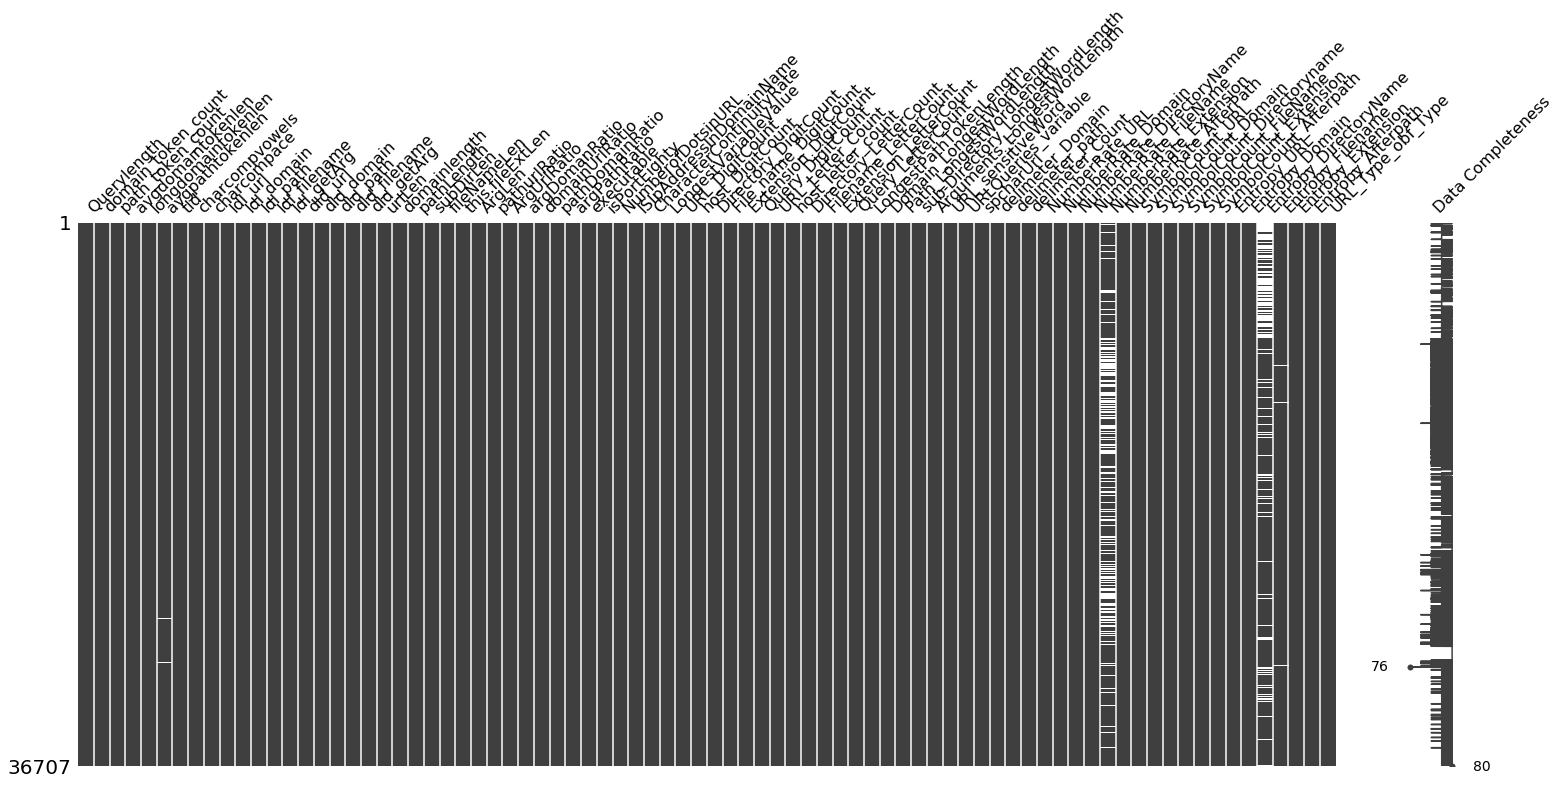

In [149]:
# Теперь проверим данные на наличие Nan
# Чтобы оценить количетсво Nan в данных, воспользуемся библиотекой missingno
import missingno as msno # Импортируем библиотеку для визулизации количетсва NaN в данных
msno.matrix(data, labels = True) 

In [150]:
# Видим, что значания для фичей NumberRate_Extension и Entropy_DirectoryName во многих сэмлах отсутствуют
# Поэтому будет логично исключить их из датасета
data.drop(columns=['Entropy_DirectoryName', 'NumberRate_Extension'],inplace=True) # Исключаем не нужные фичи из датасет

In [151]:
# Видим, что у некоторых семплов фиче Entropy_Filename и avgdomaintokenlen есть значения NaN
# Их не так много, чтобы исключать эти фичи из датасета. Поэтому мы заменем каждое значения NaN на среднее значение по фиче

data['Entropy_Filename'].fillna((data['Entropy_Filename'].mean()), inplace=True)
data['avgpathtokenlen'].fillna((data['avgpathtokenlen'].mean()), inplace=True)

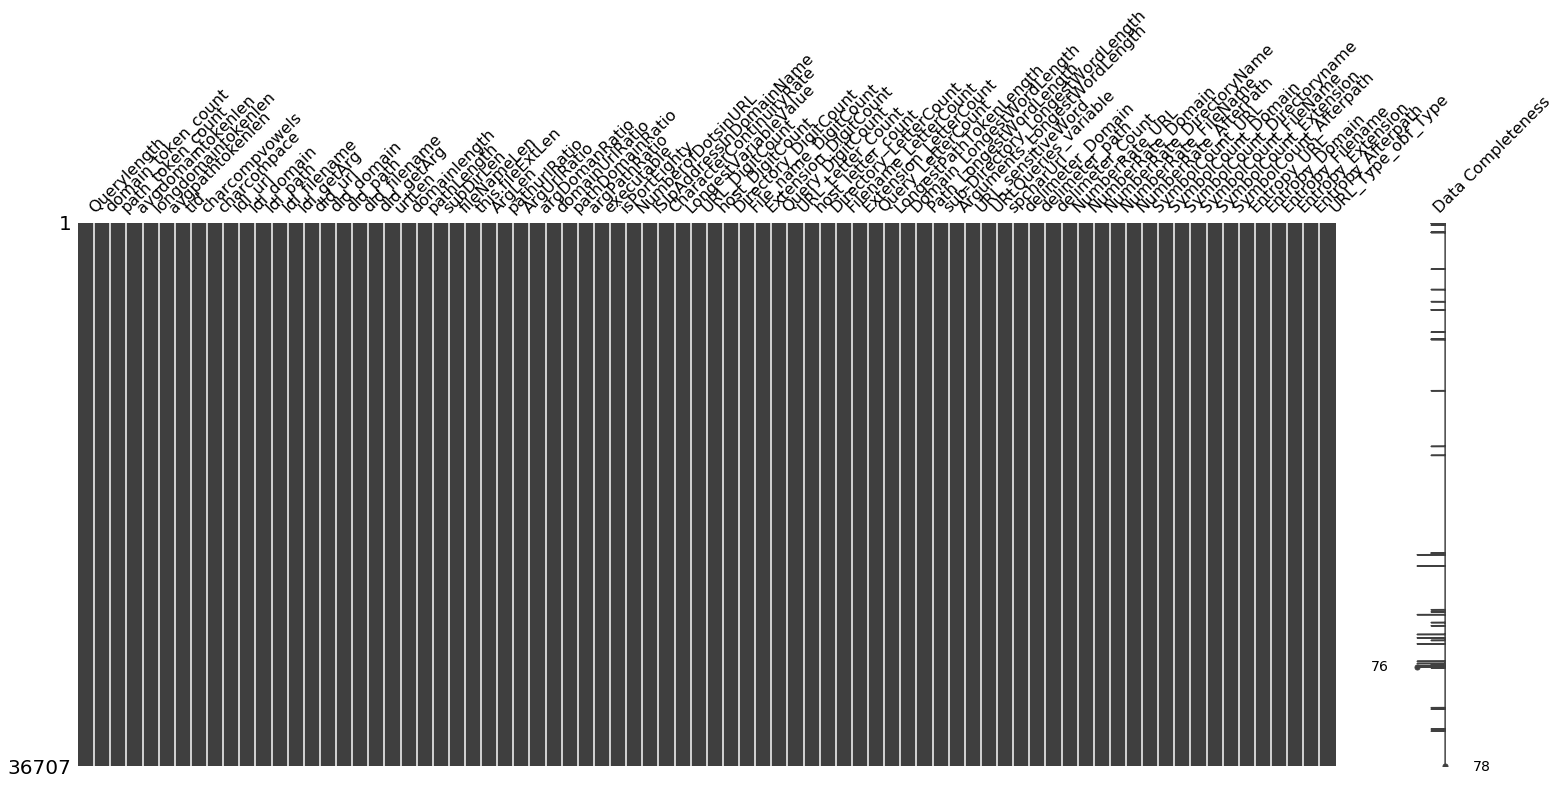

In [152]:
msno.matrix(data, labels = True) 

In [153]:
# Проверим не остались ли еще фичи со значениями NaN
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()
print(columns_with_nan)

['NumberRate_DirectoryName', 'NumberRate_FileName', 'NumberRate_AfterPath', 'Entropy_Extension', 'Entropy_Afterpath']


In [154]:
# Видим, что в 5 фичах осталиьсь значения NaN. Но их так мало, что мы не смогил увидеть их на общей диаграмме.
# В них мы также заменим все значения NaN на среднее значение по фиче

data['NumberRate_DirectoryName'].fillna((data['NumberRate_DirectoryName'].mean()), inplace=True)
data['NumberRate_FileName'].fillna((data['NumberRate_FileName'].mean()), inplace=True)
data['NumberRate_AfterPath'].fillna((data['NumberRate_AfterPath'].mean()), inplace=True)
data['Entropy_Extension'].fillna((data['Entropy_Extension'].mean()), inplace=True)
data['Entropy_Afterpath'].fillna((data['Entropy_Afterpath'].mean()), inplace=True)


In [155]:
# На данный момент label у нас представлен в виде слова, а так как мы должны предсказать чилсо, то и 
# label нам необхоидимо конвертировать в числа

from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
label = data.iloc[:,77] 
label = enc.fit_transform(label)
label

array([0, 0, 0, ..., 4, 4, 4])

In [156]:
# Короче, тут мы делаем ван хот кодирование наших лейблов. Так как я тупой, то понятия не имею как эта хуйня повысит 
# наш финальный экъюрси, но все умные парни с кэггла делают это.
from keras.utils import to_categorical
cate = to_categorical(label)

In [157]:
# Преобразуем numpy массив в датафрейм
cate = pd.DataFrame(cate)
label = pd.DataFrame(label)

In [158]:
# Меняем название фичей, чтобы потом отобразить данные на графике
cate.rename(columns={0:'Defacement',
                          1:'benign',
                          2:'malware',3:'phishing',4:'spam'}, 
                 inplace=True)

In [159]:
# Меняем в дате наши старые лейблы на новые (к которым мы применили ван хот кодирование)
data.drop(columns=['URL_Type_obf_Type'],inplace=True)
data["Defacement"]=cate["Defacement"]
data["benign"]=cate["benign"]
data["malware"]=cate["malware"]
data["phishing"]=cate["phishing"]
data["spam"]=cate["spam"]


In [160]:
# Теперь воспользуемся функцией для которой мы и преобразовывали наши лейблы выше. Эта функция отрозит корреляцию между
# фичами и классами. Делается это для того, чтобы отбросить больше бесполезных фичей, которые никак не помогут нам для 
# определения класса ссылки

b=data.corr()
b=b.loc[["Defacement","benign","malware","phishing","spam"],:]

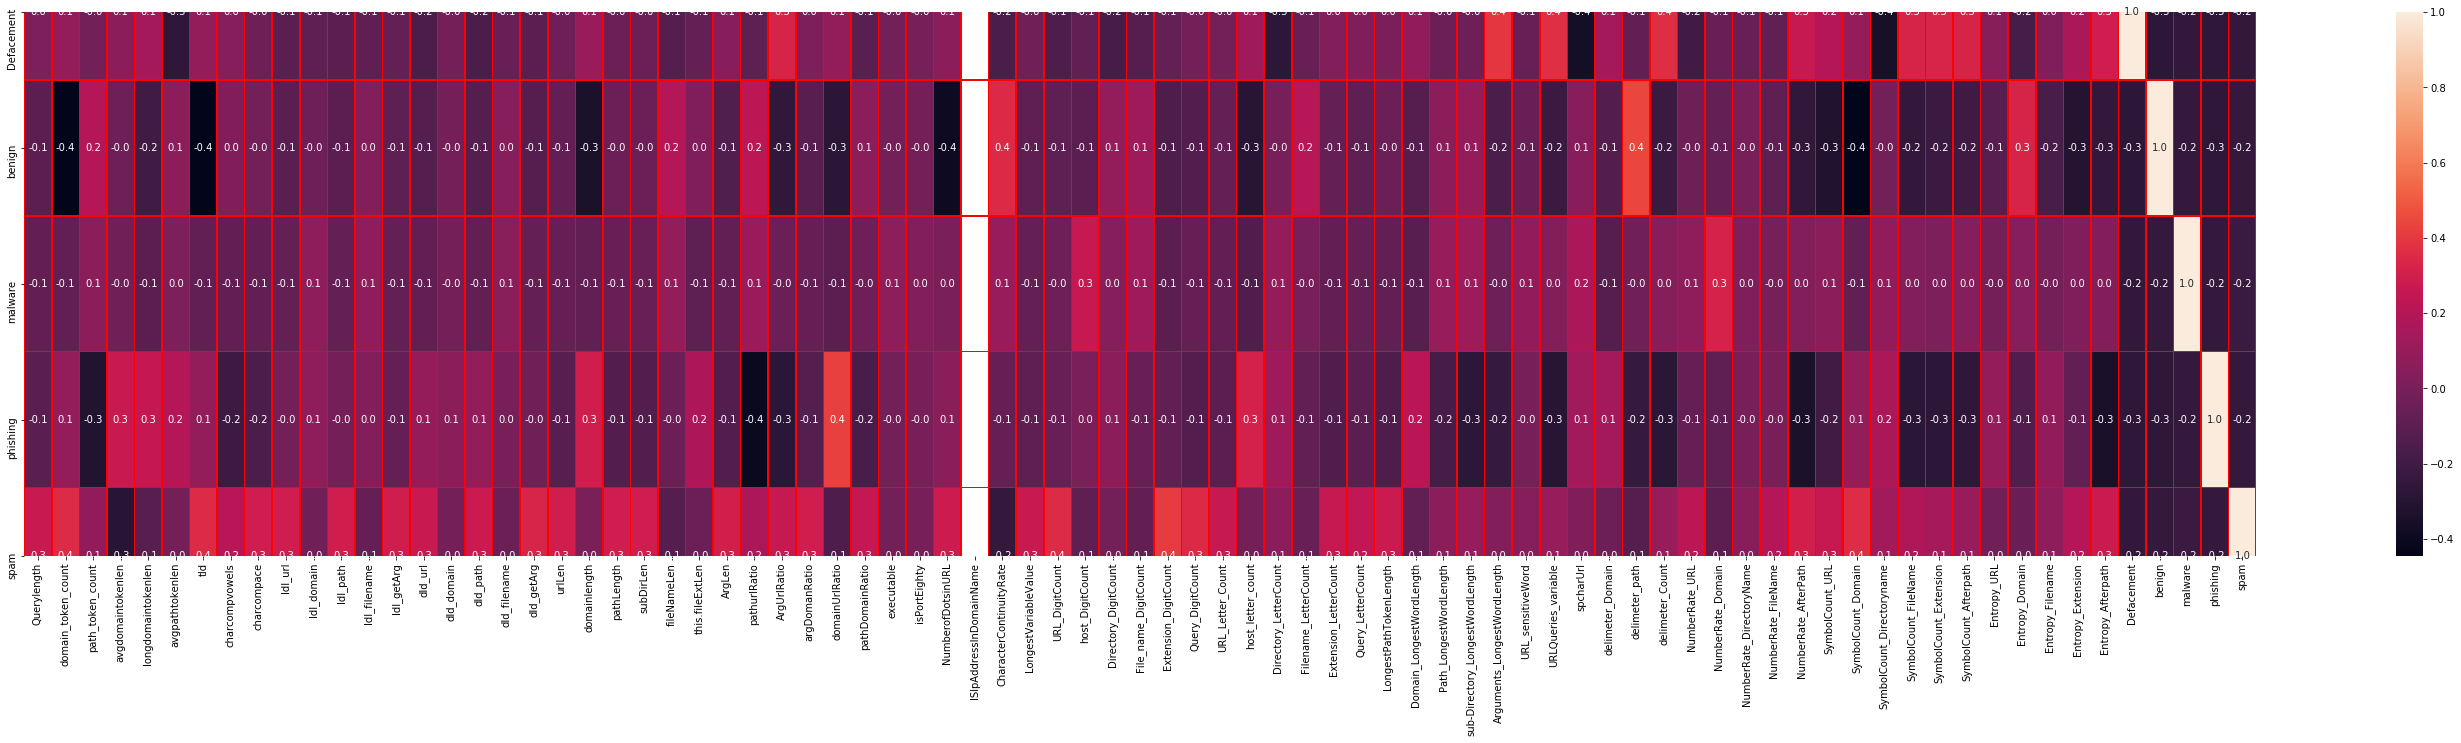

In [161]:
# Оторбражаем саму таблицу с корреляцией фичей и классов.
# Если что, можно кликнуть два раза на таблицу и она приблизится. О май гад я же не тупой зачем ты мне это говоришь.
f,ax = plt.subplots(figsize=(50, 10))
sns.heatmap(b, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [163]:
# Видим, что множество фичей имеют слабую корреляцию с классами, поэтому исключаем их из датасета

data.drop(columns=['ldl_filename','dld_filename','executable','isPortEighty','ISIpAddressInDomainName',
                   'Filename_LetterCount','Query_LetterCount','Domain_LongestWordLength','URL_sensitiveWord',
                   'NumberRate_DirectoryName','NumberRate_FileName','Entropy_URL','Entropy_Filename',
                   'Directory_DigitCount',],inplace=True)

KeyError: "['ldl_filename' 'dld_filename' 'executable' 'isPortEighty'\n 'ISIpAddressInDomainName' 'Filename_LetterCount' 'Query_LetterCount'\n 'Domain_LongestWordLength' 'URL_sensitiveWord' 'NumberRate_DirectoryName'\n 'NumberRate_FileName' 'Entropy_URL' 'Entropy_Filename'\n 'Directory_DigitCount'] not found in axis"

In [165]:
X = data.iloc[:, :63]
y = data.iloc[:, 63:]

In [107]:
# Разбиваем наш датасет на обачающую выборку и выборку для тестирование точности модели
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10) 


In [167]:
X_train = X_train.iloc[:10,:]
y_train = y_train.iloc[:10,:]

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0,n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [169]:
clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').